In [ ]:
from fastai.vision.all import *

In [ ]:
import kagglehub

path = kagglehub.dataset_download("quangtheng/garbage-classification-6-classes-775class")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/garbage-classification-6-classes-775class


In [ ]:
from pathlib import Path
train_path = Path(path)

In [ ]:
train_path.ls()

(#6) [Path('/kaggle/input/garbage-classification-6-classes-775class/metal'),Path('/kaggle/input/garbage-classification-6-classes-775class/glass'),Path('/kaggle/input/garbage-classification-6-classes-775class/organic'),Path('/kaggle/input/garbage-classification-6-classes-775class/paper'),Path('/kaggle/input/garbage-classification-6-classes-775class/battery'),Path('/kaggle/input/garbage-classification-6-classes-775class/plastic')]

In [ ]:
size = (256, 256)

In [ ]:
garbage_block = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(seed=42),
                           item_tfms=Resize(size),
                           get_y=parent_label,
                           batch_tfms=aug_transforms(size=size))
dls = garbage_block.dataloaders(path, bs=64)

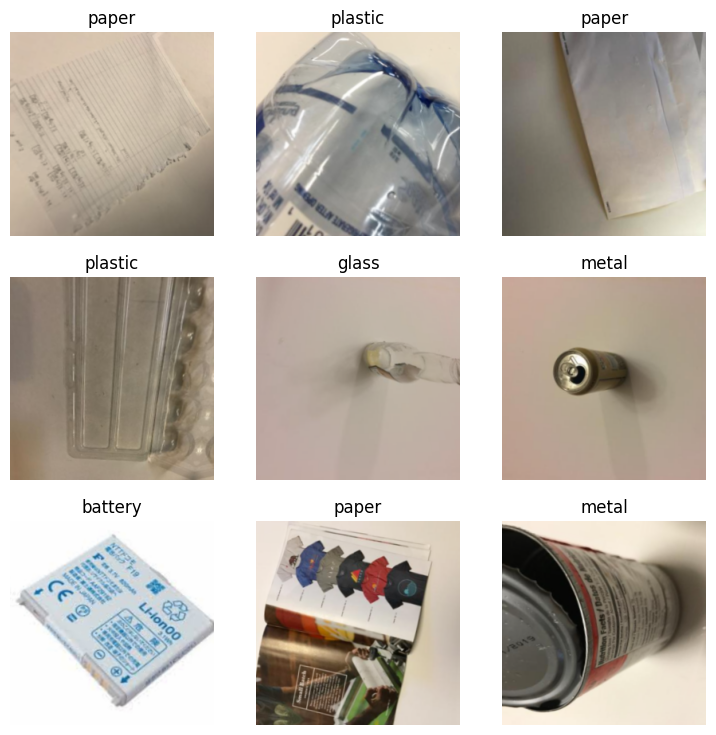

In [ ]:
dls.show_batch()

In [ ]:
garbage_block.summary(path)

Setting-up type transforms pipelines
Found 4650 items
2 datasets of sizes 3720,930
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /kaggle/input/garbage-classification-6-classes-775class/plastic/plastic158.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x384
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /kaggle/input/garbage-classification-6-classes-775class/plastic/plastic158.jpg
    applying parent_label gives
      plastic
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(5)

Final sample: (PILImage mode=RGB size=512x384, TensorCategory(5))


Found 4650 items
2 datasets of sizes 3720,930
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, '

In [ ]:
model = vision_learner(dls, resnet34, metrics=accuracy)
model.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.046582,0.257656,0.909677,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.374431,0.168327,0.936559,00:06


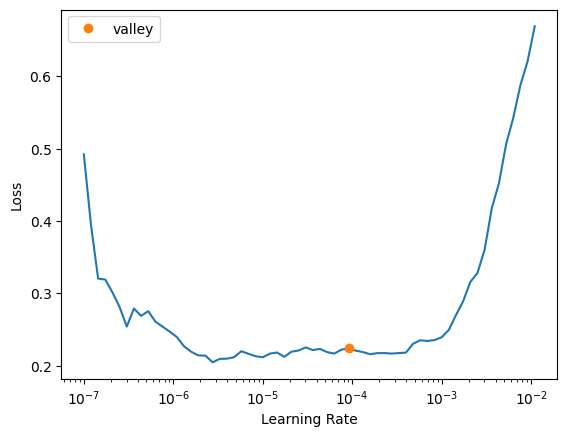

In [ ]:
valley = model.lr_find()

In [ ]:
valley

SuggestedLRs(valley=9.120108734350652e-05)

In [ ]:
model.fine_tune(5, base_lr=4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.104481,0.214517,0.949462,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.162988,0.233085,0.948387,00:06
1,0.231814,0.192592,0.939785,00:06
2,0.177736,0.155525,0.951613,00:06
3,0.104435,0.085194,0.969893,00:06
4,0.053366,0.089566,0.969893,00:06


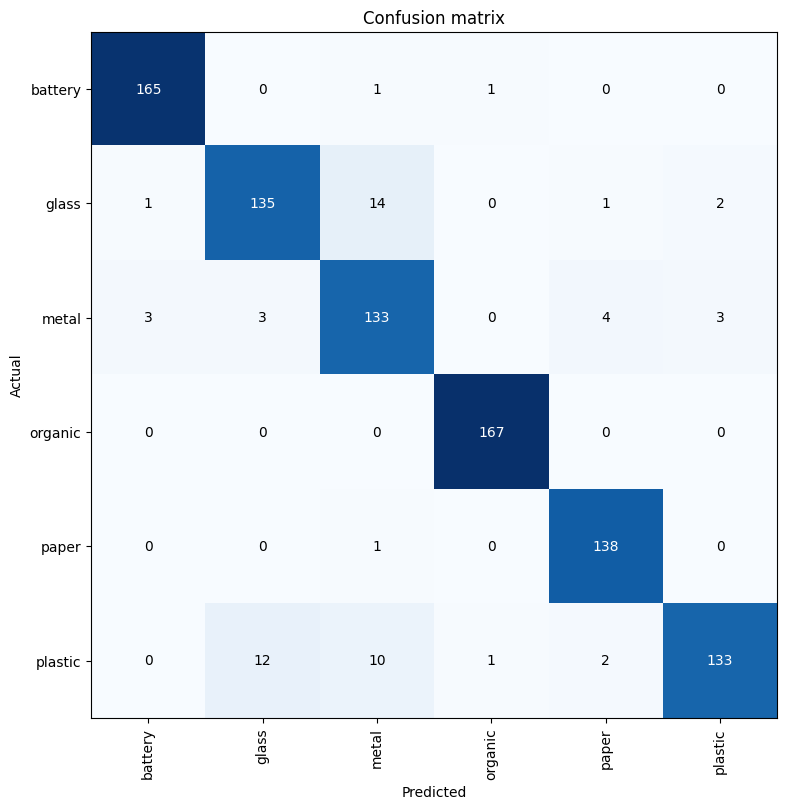

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(8,8))

In [ ]:
model.export("garbage_detector.pkl")

In [ ]:
model.predict("plastik-atik-02.jpg")

('plastic',
 tensor(5),
 tensor([4.8044e-06, 6.9073e-05, 7.0397e-06, 3.9803e-07, 1.5007e-06, 9.9992e-01]))

In [ ]:
model.loss_func

FlattenedLoss of CrossEntropyLoss()